In [3]:
!unzip /content/drive/MyDrive/test.zip
!unzip /content/drive/MyDrive/train.zip
!unzip /content/drive/MyDrive/val.zip
!unzip /content/drive/MyDrive/__MACOSX.zip
!unzip /content/drive/MyDrive/chest_xray.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: chest_xray/train/PNEUMONIA/person413_bacteria_1829.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person413_bacteria_1829.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1502_virus_2612.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1502_virus_2612.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1400_bacteria_3554.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1400_bacteria_3554.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person383_bacteria_1754.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person383_bacteria_1754.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person605_virus_1166.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person605_virus_1166.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person690_bacteria_2587.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person690_bacteria_2587.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person23_bacteria_82.jpeg  
 

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
import warnings

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
warnings.filterwarnings('ignore')

input_shape=(None,64,64,3) #expected min_ndim=4, found ndim=3


In [6]:
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.build(input_shape) #This model has not yet been built. Build the model first by calling build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 64, 64, 32)        896       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 32, 32, 32)        0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 32, 32, 32)        9248      
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 16, 16, 32)        0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 16, 16, 64)        18496     
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 8, 8, 64)          0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 8, 8, 64)          3

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')
model.fit(
        train_generator,
        steps_per_epoch=82,
        epochs=200,
        validation_data=validation_generator,
        validation_steps=82)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/200
82/82 [==============================] - 101s 838ms/step - loss: 0.5568 - accuracy: 0.7477 - val_loss: 0.4701 - val_accuracy: 0.7724
Epoch 2/200
82/82 [==============================] - 49s 594ms/step - loss: 0.3682 - accuracy: 0.8443
Epoch 3/200
82/82 [==============================] - 48s 588ms/step - loss: 0.2839 - accuracy: 0.8871
Epoch 4/200
82/82 [==============================] - 48s 592ms/step - loss: 0.2571 - accuracy: 0.8992
Epoch 5/200
82/82 [==============================] - 49s 591ms/step - loss: 0.2214 - accuracy: 0.9114
Epoch 6/200
82/82 [==============================] - 49s 592ms/step - loss: 0.2054 - accuracy: 0.9193
Epoch 7/200
82/82 [==============================] - 48s 590ms/step - loss: 0.1860 - accuracy: 0.9275
Epoch 8/200
82/82 [==============================] - 48s 590ms/step - loss: 0.1788 - accuracy: 0.9335
Epoch 9/200
82/82 [==============================] - 48s 5

In [10]:
scores = model.evaluate(validation_generator)

print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

10/10 [==============================] - 5s 460ms/step - loss: 0.8093 - accuracy: 0.8798
Loss of the model: 0.81
Test Accuracy: 87.98%


In [11]:
# Saving the model for future use
model.save('custom_model.h5py')

INFO:tensorflow:Assets written to: custom_model.h5py/assets


INFO:tensorflow:Assets written to: custom_model.h5py/assets


[[1.]]
This image is 100.00 percent PNEUMONIA


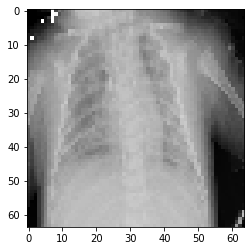

In [20]:
def predict_image(filename):
    img = load_img(filename, target_size=(64, 64))
    image = keras.preprocessing.image.img_to_array(img)
    image = image / 255.0
    image = image.reshape(1,64,64,3)
    model = tf.keras.models.load_model('custom_model.h5py')
    prediction = model.predict(image)
    print(prediction)
    plt.imshow(img)
    if(prediction[0] > 0.5):
        stat = prediction[0] * 100 
        print("This image is %.2f percent %s"% (stat, "PNEUMONIA"))
    else:
        stat = (1.0 - prediction[0]) * 100
        print("This image is %.2f percent %s" % (stat, "NORMAL"))

   
predict_image("/content/val/PNEUMONIA/person1951_bacteria_4882.jpeg")